In [3]:
from census import Census
from us import states
import pandas as pd
import numpy as np
import censusdata
import requests
import us
import matplotlib.pyplot as plt
from keys import api_census_key
import matplotlib.pyplot as plt
from us_state_abbrev import states_abb

In [4]:
#request 2017 census data
url_2017 = "https://api.census.gov/data/2017/pep/population?get=POP,GEONAME&for=state:*&DATE=9"
request_2017 = requests.get(url_2017).json()

#create dataframe
request_2017_df = pd.DataFrame(request_2017,columns=request_2017[0])

#obtain desired data
pop_2017 = request_2017_df[['POP','GEONAME']]
pop_2017 = pop_2017.rename(columns = {"POP":"2017 Population",
                                     "GEONAME":"State"})
pop_2017



,2017 Population,State
0,POP,GEONAME
1,4860545,Alabama
2,741522,Alaska
3,6908642,Arizona
4,2988231,Arkansas
5,39296476,California
6,5530105,Colorado
7,3587685,Connecticut
8,952698,Delaware
9,684336,District of Columbia


In [5]:
dfholder = []
years = [2013,2014,2015,2016]
for year in years:
    census_data = Census(api_census_key, year = year)
    census_data_years = census_data.acs5.get(('NAME', 'B01003_001E'),
                                             {'for': 'state:{}'.format(Census.ALL)})
    pop_census = pd.DataFrame(census_data_years)
    
    pop_census = pop_census.rename(columns = {"B01003_001E": f"{year} Population",
                                             "NAME":"State",
                                             "state":"State Number"})
    dfholder.append(pop_census)


In [6]:
merge_census = pop_2017.merge(dfholder[0]).merge(dfholder[1]).merge(dfholder[2]).merge(dfholder[3]).set_index(['State'])
census_df = merge_census[['State Number','2013 Population','2014 Population','2015 Population','2016 Population','2017 Population']].astype(float)
#census_df = merge_census.astype(float)
census_df.head()
census_df.to_csv('census_df.csv')

,State Number,2013 Population,2014 Population,2015 Population,2016 Population,2017 Population
State,,,,,,
Alabama,1.0,4799277.0,4817678.0,4830620.0,4841164.0,4860545.0
Alaska,2.0,720316.0,728300.0,733375.0,736855.0,741522.0
Arizona,4.0,6479703.0,6561516.0,6641928.0,6728577.0,6908642.0
Arkansas,5.0,2933369.0,2947036.0,2958208.0,2968472.0,2988231.0
California,6.0,37659181.0,38066920.0,38421464.0,38654206.0,39296476.0


In [73]:
pop_scaled = census_df[["2013 Population","2014 Population", "2016 Population","2017 Population"]]/100000
pop_change =pd.DataFrame((census_df['2017 Population']-census_df['2014 Population'])/census_df['2014 Population'])*100
pop_change = pop_change.rename( columns = {0:'Percent Change'},index = {
        'Alaska':'AK',
        'Alabama':'AL',
        'Arkansas':'AR',
        'American Samoa':'AS',
        'Arizona':'AZ',
        'California':'CA',
        'Colorado':'CO',
        'Connecticut':'CT',
        'District of Columbia':'DC',
        'Delaware':'DE',
        'Florida':'FL',
        'Georgia':'GA',
        'Guam':'GU',
        'Hawaii':'HI',
        'Iowa':'IA',
        'Idaho':'ID',
        'Illinois': 'IL',
        'Indiana':'IN',
        'Kansas':'KS',
        'Kentucky':'KY',
        'Louisiana':'LA',
        'Massachusetts':'MA',
        'Maryland':'MD',
        'Maine':'ME',
        'Michigan':'MI',
        'Minnesota':'MN',
        'Missouri':'MO',
        'Northern Mariana Islands':'MP',
        'Mississippi':'MS', 
        'Montana':'MT',
        'National': 'NA',
        'North Carolina':'NC',
        'North Dakota':'ND',
        'Nebraska':'NE',
        'New Hampshire':'NH',
        'New Jersey':'NJ',
        'New Mexico':'NM',
        'Nevada':'NV',
        'New York':'NY',
        'Ohio':'OH',
        'Oklahoma':'OK',
        'Oregon':'OR',
        'Pennsylvania':'PA',
        'Puerto Rico':'PR',
        'Rhode Island':'RI',
        'South Carolina':'SC',
        'South Dakota':'SD',
        'Tennessee':'TN',
        'Texas':'TX',
        'Utah':'UT',
        'Virginia':'VA',
        'Virgin Islands':'VI',
        'Vermont':'VT',
        'Washington':'WA',
        'Wisconsin':'WI',
        'West Virginia':'WV',
        'Wyoming':'WY'
})
pop_change = pop_change.reset_index()
#op_change = pop_change.drop(pop_change.iloc[-1])
pop_change.drop(pop_change.index[-1], inplace=True)
pop_change
pop_change.to_csv('population_change')

In [8]:
#plt.plot((census_df[["2013 Population","2014 Population", "2016 Population","2017 Population"]]))
#plt.yticks(np.arange(0, 420 ,40))

In [26]:
crime_resultdf = pd.read_csv('data/Crime_Results.csv')
crime_resultdf

,index,2014,2015,2016,2017,avg,delta,Abs,text
0,SD,72.0,103.0,144.0,199.0,129.50,176.388889,176.388889,176.39%
1,AK,146.0,380.0,445.0,317.0,322.00,117.123288,117.123288,117.12%
2,MA,968.0,1338.0,1544.0,1761.0,1402.75,81.921488,81.921488,81.92%
3,MN,450.0,410.0,468.0,759.0,521.75,68.666667,68.666667,68.67%
4,IL,3095.0,3456.0,5055.0,5089.0,4173.75,64.426494,64.426494,64.43%
5,VT,170.0,117.0,94.0,71.0,113.00,-58.235294,58.235294,-58.24%
6,KS,381.0,461.0,572.0,578.0,498.00,51.706037,51.706037,51.71%
7,CO,556.0,788.0,812.0,809.0,741.25,45.503597,45.503597,45.50%
8,AR,572.0,538.0,720.0,820.0,662.50,43.356643,43.356643,43.36%
9,WY,64.0,198.0,127.0,91.0,120.00,42.187500,42.187500,42.19%


Text(0,0.5,'Crime Percent Change')

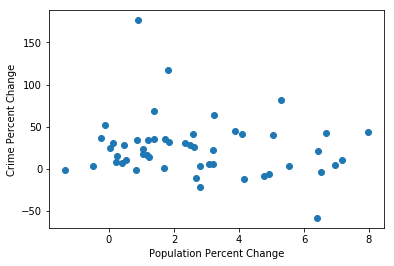

In [72]:
plt.scatter(pop_change['Percent Change'], crime_resultdf['delta'])
plt.xlabel('Population Percent Change')
plt.ylabel('Crime Percent Change')
#Observation Population increase does not correlate with increased crime.